In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

training_data = pd.read_csv('Datasets/twitter_training.csv')
# validation_data = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv')

column_name_to_drop = 'Borderlands'

training_data.drop(column_name_to_drop, axis=1, inplace=True)
training_data.drop("2401", axis=1, inplace=True)

# validation_data.drop(column_name_to_drop, axis=1, inplace=True)

# Rename the column
old_column_name = 'im getting on borderlands and i will murder you all ,'
new_column_name = 'responses'

# Check if the old column name exists before renaming
if old_column_name in training_data.columns:
    training_data.rename(columns={old_column_name: new_column_name}, inplace=True)
    
# Rename the column
old_column_name = 'Positive'
new_column_name = 'Sentiment'

# Check if the old column name exists before renaming
if old_column_name in training_data.columns:
    training_data.rename(columns={old_column_name: new_column_name}, inplace=True)

In [2]:
training_data.head()

,Sentiment,responses
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [3]:
training_data['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [4]:
training_data.to_csv('cleanSentimentData.csv', index=True)

In [6]:
# Load training data
# training_data = pd.read_csv('/kaggle/working/cleanSentimentData.csv')

training_data.dropna(subset=['responses', 'Sentiment'], inplace=True)

# Convert string labels to numeric labels
label_mapping = {'Positive': 1, 'Negative': 0, 'Irrelevant': 3, 'Neutral' : 2}  # Update this mapping based on your actual class labels
training_data['Sentiment'] = training_data['Sentiment'].map(label_mapping)
# ['Positive', 'Neutral', 'Negative', 'Irrelevant']

# Assuming 'Sentiment' is the target variable and 'responses' is the feature
X = training_data['responses']
y = training_data['Sentiment']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [7]:
# Convert y_test to binary format for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Update classes based on your labels

# Train a Logistic Regression model with OneVsRestClassifier
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train_vectorized, y_train)


# # Train a Logistic Regression model
# model = LogisticRegression()
# model.fit(X_train_vectorized, y_train)

C:\Users\Chandanmal Bardia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chandanmal Bardia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

OneVsRestClassifier(estimator=LogisticRegression())

In [8]:
def print_metrics(y_true, y_pred_prob, threshold=0.5, average='weighted'):
    y_pred = (y_pred_prob[:, 1] > threshold).astype(int)
    
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    f_score = f1_score(y_true, y_pred, average=average)
    
    val = round(accuracy, 2) 
    
    print(f"Accuracy: {val * 100} %")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Precision: {round(precision, 2) * 100}")
    print(f"Recall: {round(recall, 2) * 100}")
    print(f"F-Score: {round(f_score, 2) * 100}")

    # Plot AUC-ROC curve for each class
    plt.figure(figsize=(8, 8))
    for i in range(len(label_mapping)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass (One-vs-Rest)')
    plt.legend(loc='lower right')
    plt.show()

# Function for making predictions
def predict_sentiment(model, text):
    text_vectorized = vectorizer.transform([text])
    return model.predict(text_vectorized)[0], model.predict_proba(text_vectorized)[0]

Accuracy: 51.0 %
Confusion Matrix:
[[4321  142    0    0]
 [ 845 3278    0    0]
 [3412  177    0    0]
 [2476  148    0    0]]
Precision: 36.0
Recall: 51.0
F-Score: 40.0


C:\Users\Chandanmal Bardia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


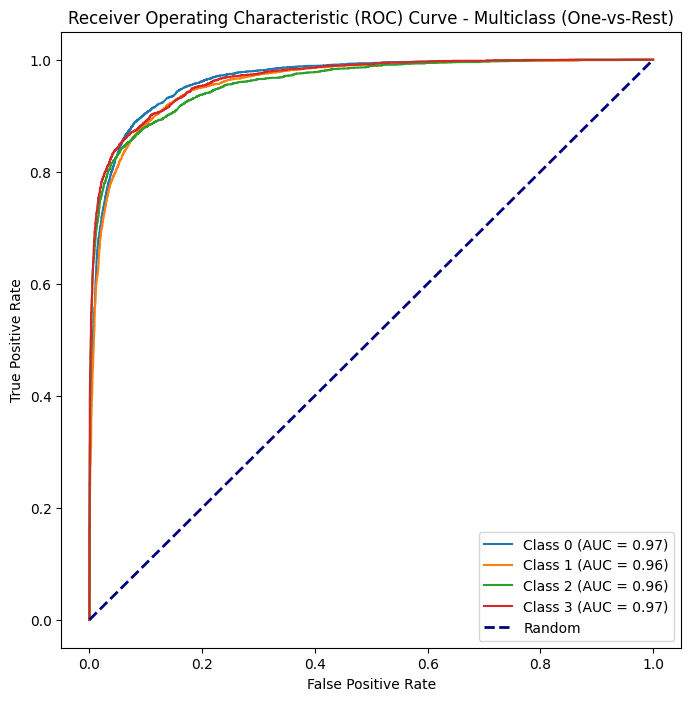


Inference for 'I love playing Borderlands, it's an amazing game!':
Predicted Sentiment: Positive
Probability: 0.9270


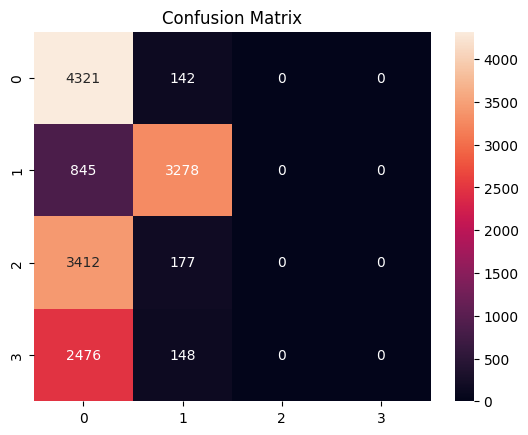

In [9]:
# Test the model
y_test_pred_prob = model.predict_proba(X_test_vectorized)

# Print evaluation metrics
print_metrics(y_test, y_test_pred_prob)

# Example for making predictions
sample_text = "I love playing Borderlands, it's an amazing game!"
prediction, probability = predict_sentiment(model, sample_text)
print(f"\nInference for '{sample_text}':")
predClassesNames = ['Negative', 'Positive', 'Neutral', 'Irrelevant']
print(f"Predicted Sentiment: {predClassesNames[prediction]}")

print(f"Probability: {probability[1]:.4f}")

# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, (y_test_pred_prob[:, 1] > 0.5).astype(int)), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [11]:
#twitterSentiment-Regression